# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Create a new dataframe from your CSV
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [5]:
# Print out any information you need to understand your dataframe
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [9]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [6]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [7]:
df.shape

(23486, 11)

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

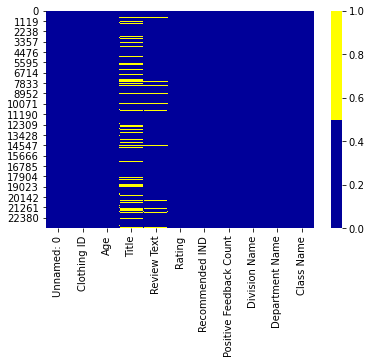

In [8]:
# Plot a heatmap of any missing data
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [10]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot:xlabel='index'>

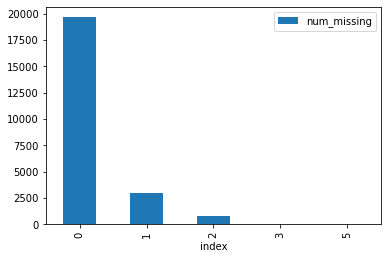

In [20]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
df['num_missing']

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [24]:
# Handle any missing data in your dataframe.
# drop rows with any missing values.
ind_missing = df[df['num_missing'] > 0].index
df_less_missing_rows = df.drop(ind_missing, axis=0)
df_less_missing_rows.shape

(19662, 17)

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

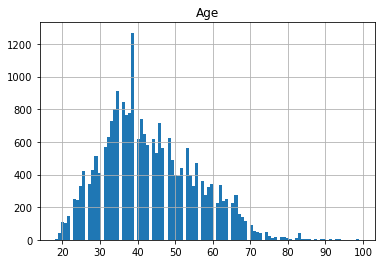

In [31]:
# Plot a histogram to see if there are any outliers.
df[['Age']].hist(bins=100)

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

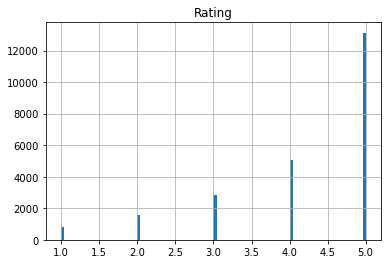

In [32]:
df[['Rating']].hist(bins=100)

array([[<AxesSubplot:title={'center':'Positive Feedback Count'}>]],
      dtype=object)

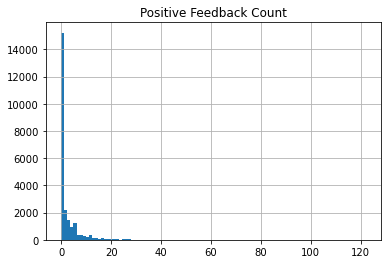

In [33]:
df[['Positive Feedback Count']].hist(bins=100)

In [35]:
# Use the describe() method
df[['Age', 'Rating','Positive Feedback Count']].describe()

,Age,Rating,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,2.535936
std,12.279544,1.110031,5.702202
min,18.000000,1.000000,0.000000
25%,34.000000,4.000000,0.000000
50%,41.000000,5.000000,1.000000
75%,52.000000,5.000000,3.000000
max,99.000000,5.000000,122.000000


<AxesSubplot:xlabel='Division Name,Department Name'>

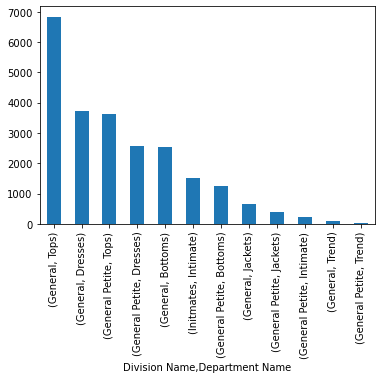

In [40]:
# Plot a bar chart
df[['Division Name', 'Department Name']].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?
Histogram and especially the Describe techniques

In [43]:
# Handle any outliers in your dataframe
cols = ['Age', 'Positive Feedback Count'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df_new = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new[['Age', 'Positive Feedback Count']].describe()

,Age,Positive Feedback Count
count,20304.000000,20304.000000
mean,42.725079,0.966411
std,11.871049,1.365181
min,18.000000,0.000000
25%,34.000000,0.000000
50%,41.000000,0.000000
75%,51.000000,2.000000
max,76.000000,5.000000


In [44]:
df_new.shape

(20304, 17)

In [45]:
df.shape

(20304, 17)

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [11]:
# Look for any irrelevant data in the dataframe. How will you handle it?
I would find those columns that aren't needed and simply delete them!

In [46]:
# Look for duplicates. How will you handle any duplicates?
df_dedupped = df.drop('Clothing ID', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(20304, 17)
(20304, 16)


In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
Title would probably be uninformative

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [47]:
# Try to convert all the strings in a column to lower or upper case. 
# make everything lower case.
df['Division_Name_lower'] = df['Division Name'].str.lower()
df['Division_Name_lower'].value_counts(dropna=False)

general           11974
general petite     6954
initmates          1362
NaN                  14
Name: Division_Name_lower, dtype: int64

In [48]:
df['Division Name'].value_counts(dropna=False)

General           11974
General Petite     6954
Initmates          1362
NaN                  14
Name: Division Name, dtype: int64